In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("BIKE DETAILS.csv")

In [8]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [9]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


1.What is the range of selling prices in the dataset?

-->the range of selling prices in the dataset is from 5000 to 760000

In [10]:
df.selling_price.sort_values(ascending = False)

,selling_price
295,760000
134,750000
289,425000
13,365000
311,330000
...,...
77,7500
115,7500
567,6000
748,6000


2.What is the median selling price for bikes in the dataset?

In [11]:
df.selling_price.median()

45000.0

3. What is the most common seller type?

-->Individual is the most common seller type.

In [12]:
df.seller_type.value_counts()

,count
seller_type,
Individual,1055
Dealer,6


 4.How many bikes have driven more than 50,000 kilometers?

 --> 170 bikes have driven more than 50,000 kilometers.

In [13]:
len(df[df['km_driven']>50000])

170

6.What proportion of bikes are from the year 2015 or older?

-->  0.57 will be the proportion of bikes are from the year 2015 or older


In [14]:
bikes_2015_or_older=len(df[df["year"]<=2015])

In [15]:
total_bikes=len(df["year"])

In [16]:
result =bikes_2015_or_older / total_bikes
result =round(result,2)
result

0.57

7. What is the trend of missing values across the dataset?

In [17]:
missing_values =df.isnull().sum()
missing_values

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


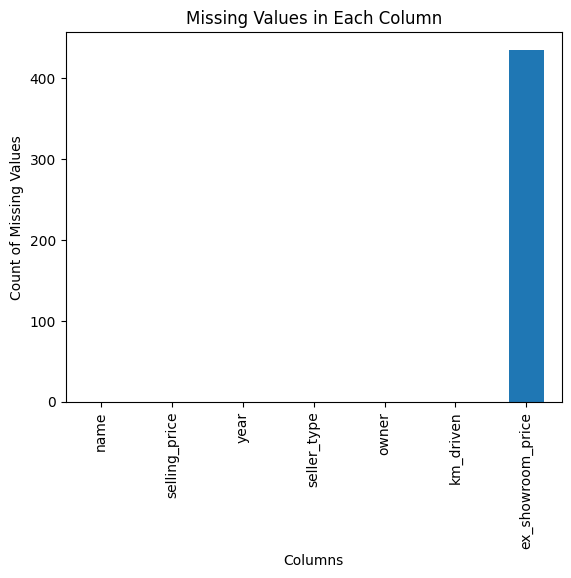

In [18]:
missing_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values in Each Column')
plt.show()

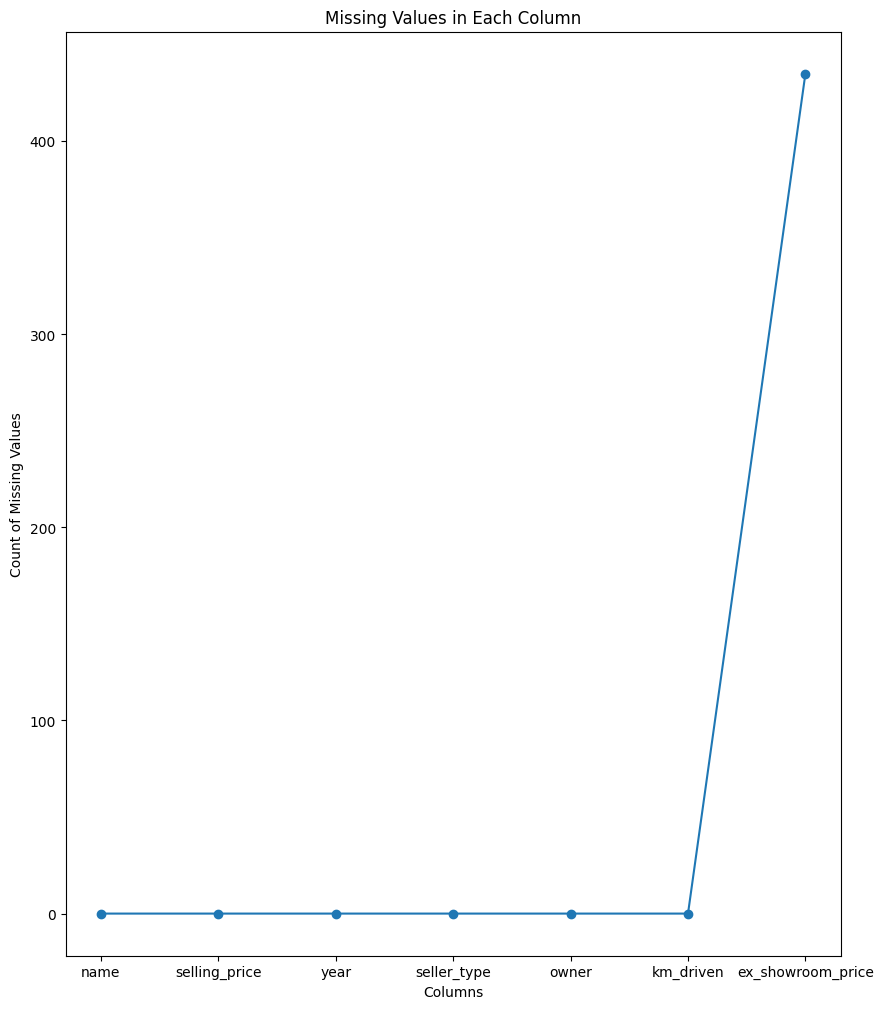

In [19]:
fig = plt.figure(figsize=(10,12))
plt.plot(missing_values.index,missing_values.values,marker="o")
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values in Each Column')
plt.show()

8.What is the highest ex_showroom_price recorded, and for which bike?

In [20]:
max_price_bike=df.groupby("name")["ex_showroom_price"].max().sort_values(ascending=False)

highest_price_bike_name=max_price_bike.idxmax()

#The idxmax() function in pandas is used to return
#the index of the first occurrence of the maximum value in a Series or DataFrame column.

highest_price_bike_value=max_price_bike.max()

print("bike with the highest ex-showroom price:")
print("name:",highest_price_bike_name)
print("ex-showroom price:",highest_price_bike_value)

bike with the highest ex-showroom price:
name: Harley-Davidson Street Bob
ex-showroom price: 1278000.0


9.What is the total number of bikes listed by each seller type?

In [21]:
df.seller_type.value_counts()

,count
seller_type,
Individual,1055
Dealer,6


10.What is the relationship between selling_price and km_driven for first-owner bikes?


-->INSIGHTS=The first owner drove/use the bike the most kilometers.


<Axes: xlabel='selling_price', ylabel='km_driven'>

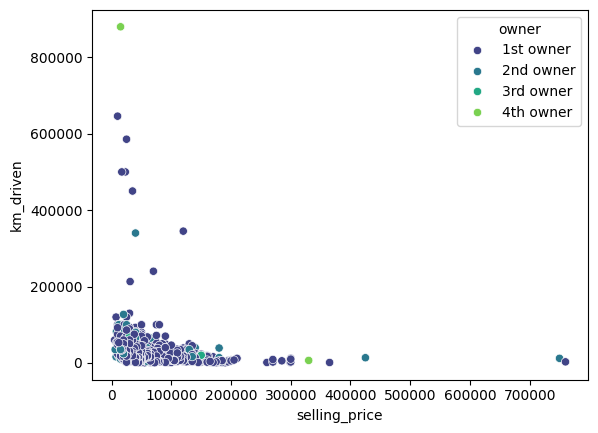

In [22]:
sns.scatterplot(x="selling_price",y="km_driven",hue="owner",data=df,palette="viridis")

<Axes: xlabel='selling_price', ylabel='km_driven'>

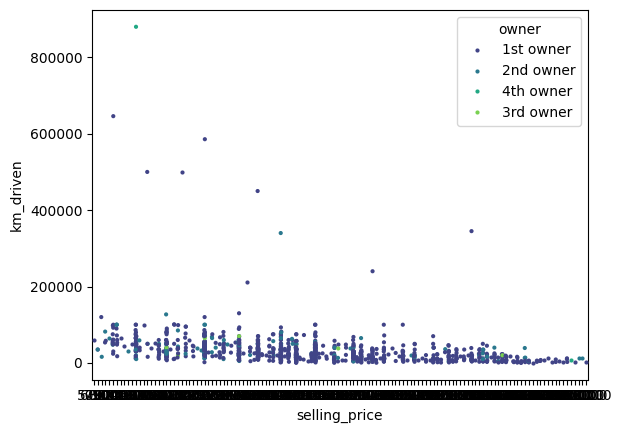

In [23]:
sns.stripplot(x="selling_price",y="km_driven",hue="owner",data=df,palette="viridis",size=3)

11.Identify and remove outliers in the km_driven column using the IQR method?

In [24]:
#calculate Q1 and Q3
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Identify outliers
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]

print("lower bound:",lower_bound)
print("upper_bound:",upper_bound)
print("outliers:")
print(outliers)

lower bound: -30750.0
upper_bound: 87250.0
outliers:
                                 name  selling_price  year seller_type  \
91           Honda Activa [2000-2015]          22989  2012  Individual   
93                      Suzuki GS150R          30000  2010  Individual   
115           Hero Honda Passion Plus           7500  2004  Individual   
135            Hero Honda CBZ extreme          20000  2007  Individual   
154                Hero Xtreme Sports          22000  2014  Individual   
184              Honda CB Unicorn 160          75000  2015  Individual   
363                Hero Honda CD100SS          10000  1997  Individual   
470          Honda Activa [2000-2015]          23000  2009  Individual   
474     Hero Honda Passion PRO [2012]          12000  2012  Individual   
477          Honda Activa [2000-2015]          25000  2009  Individual   
511                Hero Splendor Plus          12000  2007  Individual   
535              Hero Honda CD Deluxe          12000  2007 

<Axes: xlabel='km_driven'>

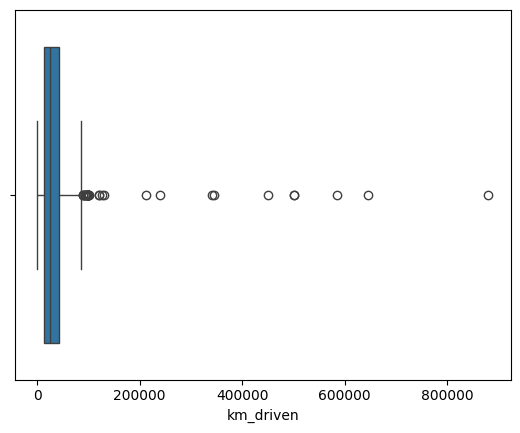

In [25]:
sns.boxplot(data=df,x="km_driven")

In [26]:
df_filtered = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]

In [27]:
df_filtered.shape

(1022, 7)

<Axes: xlabel='km_driven'>

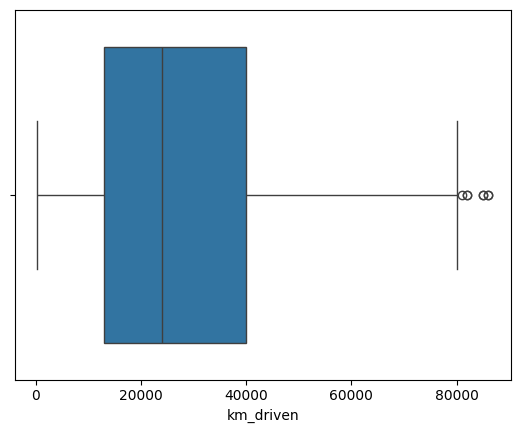

In [28]:
sns.boxplot(data=df_filtered,x="km_driven")

In [29]:
#imputation
df["filtered_km_driven"] = np.where((df["km_driven"] <=lower_bound)| (df["km_driven"] >=upper_bound),df["km_driven"].median(),df["km_driven"])

In [30]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,filtered_km_driven
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,350.0
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,5650.0
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,12000.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,23000.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,21000.0
...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0,25000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,33000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,35000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0,53000.0


12.Perform a bivariate analysis to visualize the relationship between year and selling_price

-->INSIGHTS = the number of selling price increases after 2010.

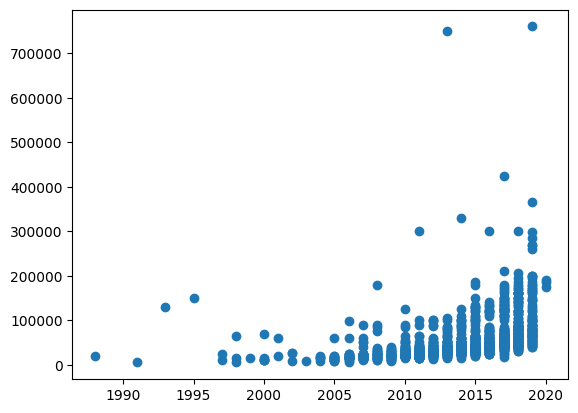

In [31]:
plt.scatter(x="year",y="selling_price",data=df)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [33]:
df = pd.read_csv("BIKE DETAILS.csv")

In [34]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

In [35]:
df.shape

(1061, 7)

In [36]:
current_year = 2025.0
df["Bike_Age"] = current_year - df["year"]

In [37]:
df["depreciation_amt"] = df["ex_showroom_price"] - df["selling_price"]

In [38]:
df["depreciation_rpy"] = df["depreciation_amt"]/df["Bike_Age"]

In [39]:
avg_depreciation_rate = df["depreciation_rpy"].mean()

In [40]:
print(f"Average Depreciation Rate per Year: ₹{avg_depreciation_rate:.2f}")

Average Depreciation Rate per Year: ₹2666.56


In [41]:
df["selling_price"]=df["selling_price"].astype("float")

In [42]:
df["year"]=df["year"].astype("float")

14. Which bike names are priced significantly above the average price for their manufacturing year?

In [43]:
df.groupby("name")["year"].value_counts()

name                        year  
Activa 3g                   2010.0    1
                            2018.0    1
Activa 4g                   2019.0    1
Aprilia SR 125              2018.0    1
                            2019.0    1
                                     ..
Yamaha YZF R15 [2011-2018]  2012.0    1
                            2014.0    1
                            2017.0    1
Yamaha YZF R3               2019.0    1
Yo Style                    2011.0    1
Name: count, Length: 685, dtype: int64

In [44]:
df.groupby("ex_showroom_price")["selling_price"].mean()

,selling_price
ex_showroom_price,
30490.0,30000.0
32000.0,18000.0
37675.0,20000.0
42859.0,24299.9
44140.0,18000.0
...,...
534000.0,330000.0
589000.0,300000.0
599000.0,425000.0


15.Develop a correlation matrix for numeric columns and visualize it using a heatmap.

In [45]:
df.corr(numeric_only= True)

,selling_price,year,km_driven,ex_showroom_price,Bike_Age,depreciation_amt,depreciation_rpy
selling_price,1.000000,0.402188,-0.212937,0.918583,-0.402188,0.345663,0.383799
year,0.402188,1.000000,-0.288675,0.126378,-1.000000,-0.343490,-0.148647
km_driven,-0.212937,-0.288675,1.000000,-0.122011,0.288675,0.066531,0.012413
ex_showroom_price,0.918583,0.126378,-0.122011,1.000000,-0.126378,0.688385,0.698461
Bike_Age,-0.402188,-1.000000,0.288675,-0.126378,1.000000,0.343490,0.148647
depreciation_amt,0.345663,-0.343490,0.066531,0.688385,0.343490,1.000000,0.953934
depreciation_rpy,0.383799,-0.148647,0.012413,0.698461,0.148647,0.953934,1.000000


<Axes: >

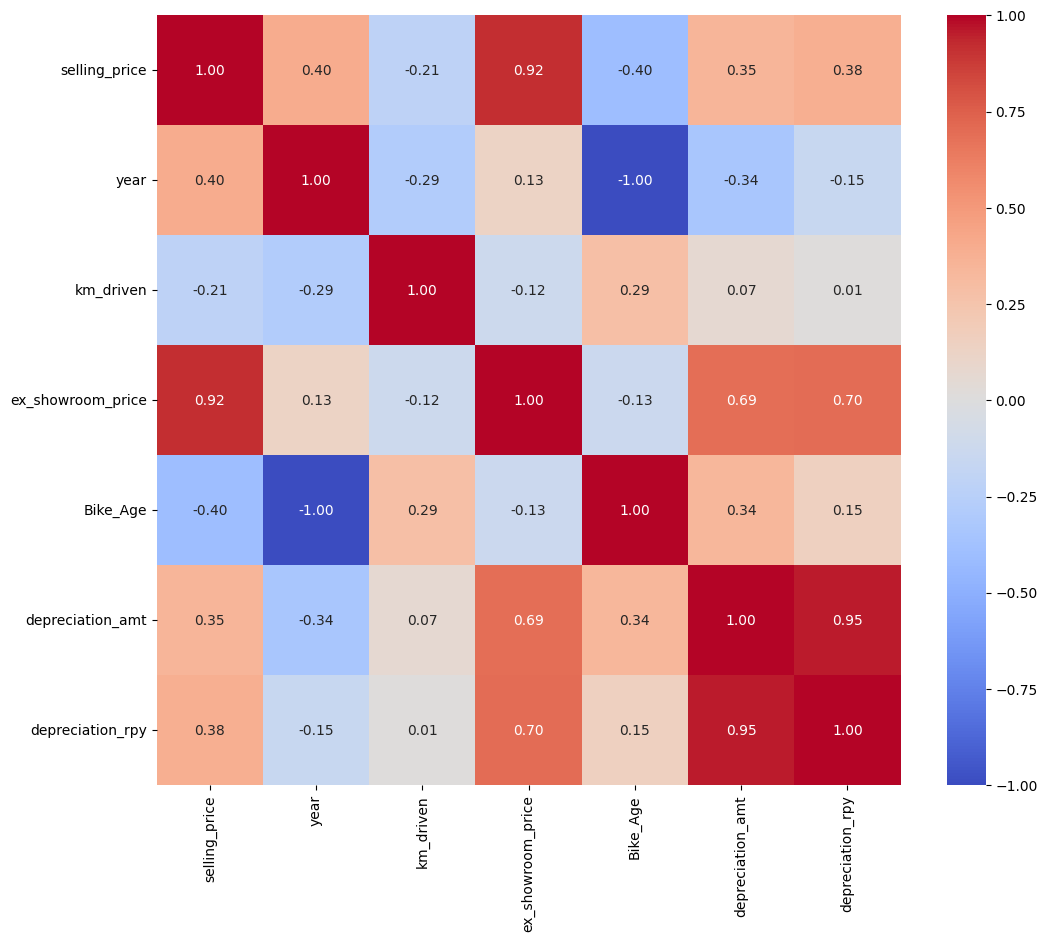

In [46]:
corr = df.corr(numeric_only = True)
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")